### **📌Stock Market Analysis Using Python**  
✅ Fetch data from Yahoo Finance  
✅ Clean the data  
✅ Plot stock price trends  
✅ Visualize trading volume  
✅ Compute & plot moving averages  
✅ Calculate & analyze daily returns  
✅ Add & visualize the trend column  
✅ Compute & plot correlation matrix  

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Define stock tickers
stocks = ["AAPL", "GOOGL", "AMZN", "MSFT"]

# Fetching data from Yahoo Finance (Last 5 Years)


In [38]:
# Data Cleaning
data = yf.download(stocks, start="2020-01-01", end="2025-01-01")['Close']


# Drop missing values
data.dropna(inplace=True)

[*********************100%***********************]  4 of 4 completed


# Show top 5 rows of dataset

In [42]:
data.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-01-02,72.716072,94.900497,68.186821,153.323257
2020-01-03,72.009117,93.748497,67.830109,151.414108
2020-01-06,72.582909,95.143997,69.638054,151.805450
2020-01-07,72.241531,95.343002,69.503548,150.421371
2020-01-08,73.403633,94.598503,69.998245,152.817322


# Plot stock price trends

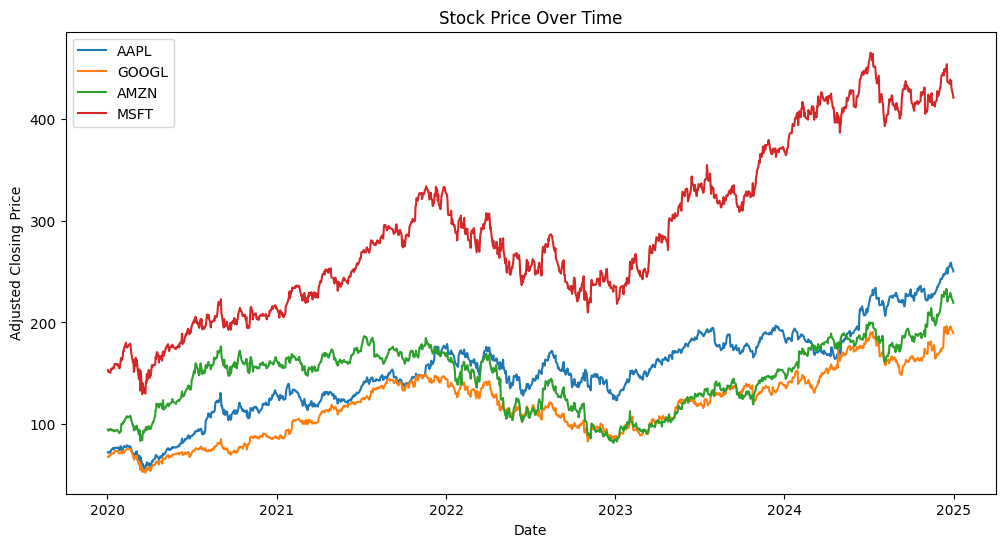

In [ ]:

plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(data.index, data[stock], label=stock)
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.legend()
plt.show()


# Visualize stock volume over time

[*********************100%***********************]  4 of 4 completed


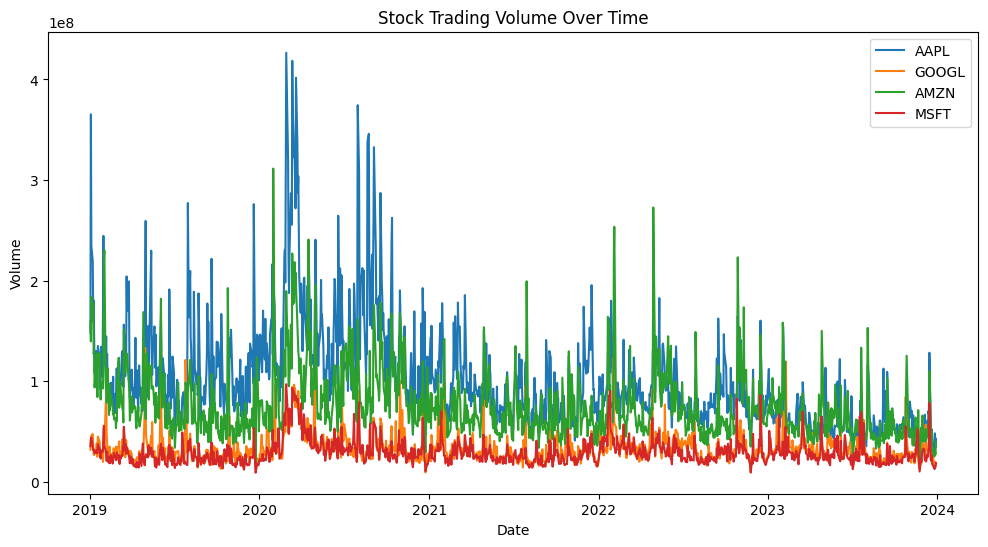

In [44]:

volume_data = yf.download(stocks, start="2019-01-01", end="2024-01-01")['Volume']
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(volume_data.index, volume_data[stock], label=stock)
plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Calculate Moving Averages (50-day & 200-day)

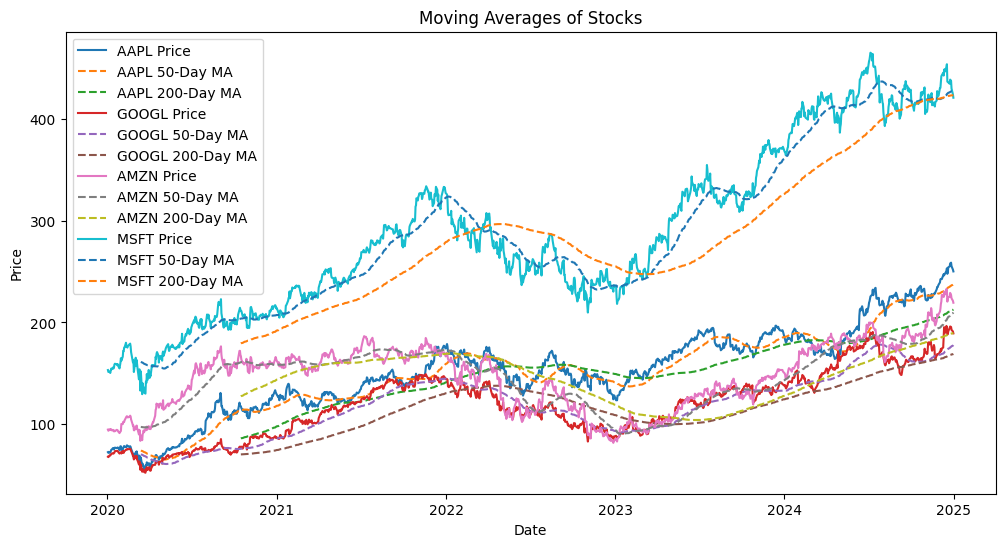

In [45]:

moving_averages = data.copy()
for stock in stocks:
    moving_averages[f'{stock}_50MA'] = data[stock].rolling(window=50).mean()
    moving_averages[f'{stock}_200MA'] = data[stock].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(data.index, data[stock], label=f"{stock} Price")
    plt.plot(moving_averages.index, moving_averages[f"{stock}_50MA"], linestyle="--", label=f"{stock} 50-Day MA")
    plt.plot(moving_averages.index, moving_averages[f"{stock}_200MA"], linestyle="--", label=f"{stock} 200-Day MA")
plt.title("Moving Averages of Stocks")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Calculate Daily Returns


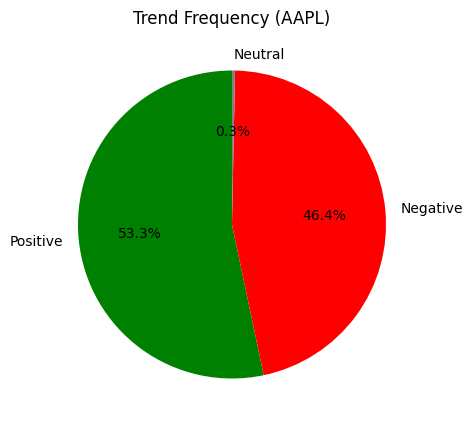

In [46]:
daily_returns = data.pct_change().dropna()

# Add a 'Trend' Column
trend = daily_returns.applymap(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Visualize trend frequency using a pie chart
plt.figure(figsize=(10, 5))
trend['AAPL'].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["green", "red", "gray"], startangle=90)
plt.title("Trend Frequency (AAPL)")
plt.ylabel("")  # Hide y-label
plt.show()

# Correlation Matrix of Daily Returns

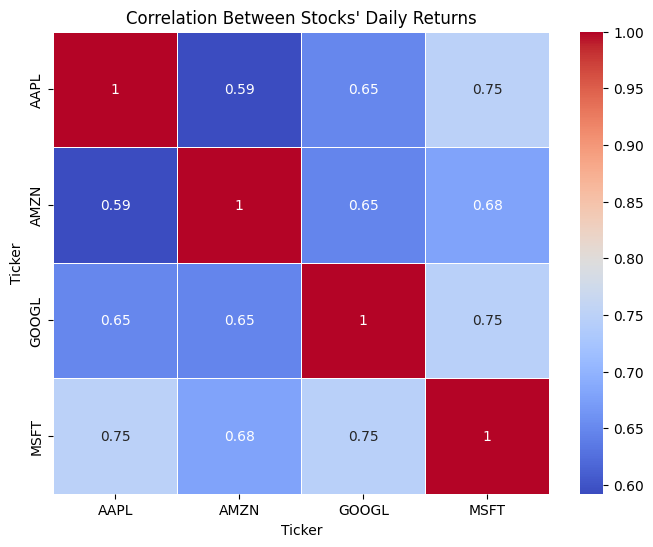

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Stocks' Daily Returns")
plt.show()